# Feature analysis

In [172]:
from SimpleCV import *
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
import pandas as pd
import cv2
import glob
import sklearn 

df = pd.read_csv("../dataset-numpy/dataset_features.csv")
df.head()

,grid_1_1,grid_1_2,grid_1_3,grid_1_4,grid_2_1,grid_2_2,grid_2_3,grid_2_4,grid_3_1,grid_3_2,...,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
0,0,1,1,0,0,1,1,0,0,1,...,15.424528,15.757469,90,30,20,1,1,1,1,0
1,0,1,1,0,0,1,0,0,0,0,...,15.733333,16.043575,90,30,21,1,1,1,1,0
2,0,1,1,0,0,1,1,0,0,1,...,16.009158,15.209890,90,30,19,1,1,0,1,0
3,0,1,1,0,0,1,1,0,0,0,...,15.229571,16.378563,90,30,20,1,1,0,1,0
4,0,1,1,0,0,1,1,0,0,0,...,15.646126,16.255135,90,30,20,1,1,1,0,0


In [90]:
df.describe()

,grid_1_1,grid_1_2,grid_1_3,grid_1_4,grid_2_1,grid_2_2,grid_2_3,grid_2_4,grid_3_1,grid_3_2,...,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.000521,0.914062,0.864062,0.065104,0.014063,0.798958,0.757812,0.042188,0.021354,0.666667,...,15.859298,15.380416,50.857330,29.997917,20.457292,0.377083,0.295312,0.211458,0.348958,4.532813
std,0.022822,0.280345,0.342811,0.246774,0.117779,0.400884,0.428519,0.201069,0.144600,0.471527,...,1.193617,1.869070,65.489537,0.064533,2.035446,0.574330,0.456302,0.408449,0.476765,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.835737,10.582800,-87.878899,28.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,15.077516,14.116460,65.718203,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,15.797984,15.295089,85.236358,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,16.571982,16.354908,90.000000,30.000000,22.000000,1.000000,1.000000,0.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.410788,20.841542,90.000000,30.000000,30.000000,2.000000,1.000000,1.000000,1.000000,9.000000


In [131]:
colors = cm.rainbow(np.linspace(0, 1, 10))

It was excpected that the centroid will show the difference between a 6 and a 9, this is confirmed in the graph.

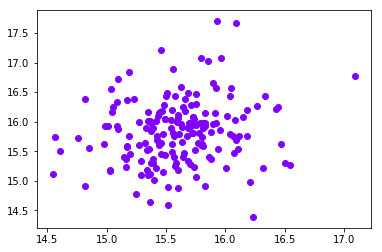

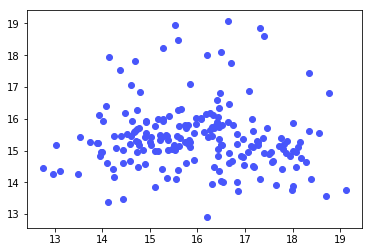

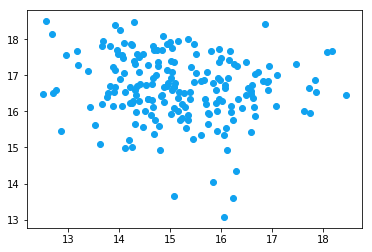

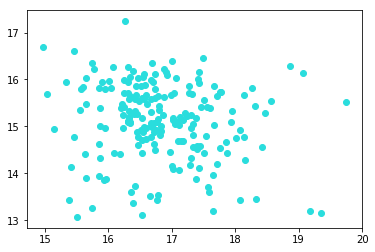

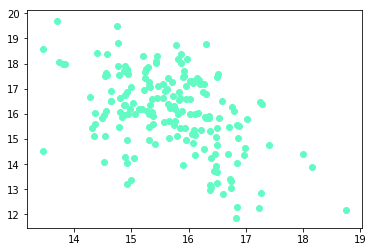

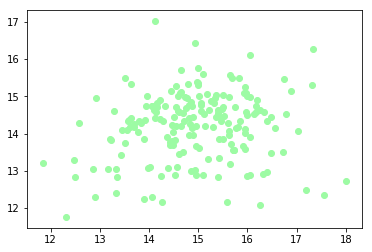

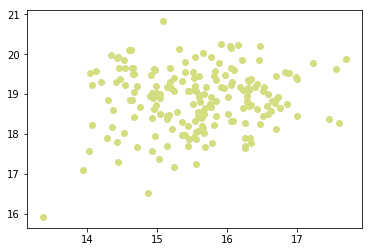

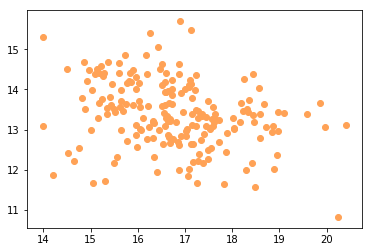

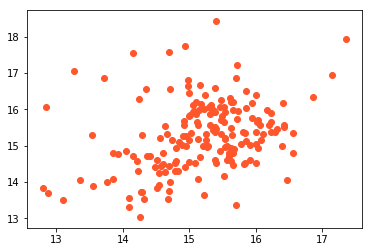

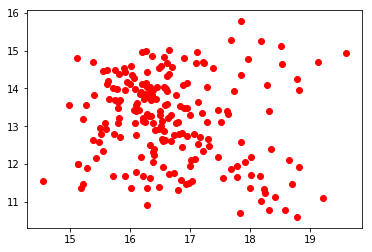

In [132]:
#check if x and y centroids are apart

# colors = ['red', 'blue','green', 'violet', 'yellow', 'orangered', 'lightpink', 'lime', 'brown', 'grey']


for i in range(10):
    plt.figure()
    centroid = df[(df.label == i)]
    xCentroid = centroid.blob_centroid_x
    yCentroid = centroid.blob_centroid_y
    plt.scatter(x=xCentroid, y= yCentroid, c=colors[i])
    
# centroid6 = df[(df.label == 6)]
# xCentroid6 = centroid6['blob_centroid_x']
# yCentroid6 = centroid6['blob_centroid_y']
# centroid9 = df[(df.label == 9)]
# xCentroid9 = centroid9['blob_centroid_x']
# yCentroid9 = centroid9['blob_centroid_y']
# plt.scatter(x= xCentroid6, y= yCentroid6, c='DarkBlue')
# plt.scatter(x= xCentroid9, y= yCentroid9, c='DarkGreen')
# plt.legend(["6", "9"]);



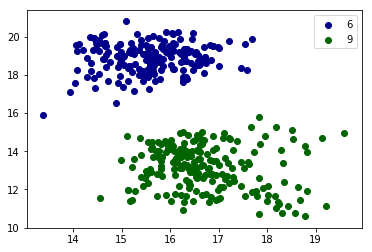

In [92]:

centroid6 = df[(df.label == 6)]
xCentroid6 = centroid6['blob_centroid_x']
yCentroid6 = centroid6['blob_centroid_y']
centroid9 = df[(df.label == 9)]
xCentroid9 = centroid9['blob_centroid_x']
yCentroid9 = centroid9['blob_centroid_y']
plt.scatter(x= xCentroid6, y= yCentroid6, c='DarkBlue')
plt.scatter(x= xCentroid9, y= yCentroid9, c='DarkGreen')
plt.legend(["6", "9"]);

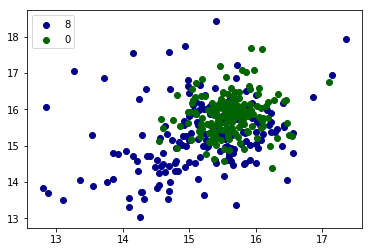

In [93]:
centroid8 = df[(df.label == 8)]
xCentroid8 = centroid8['blob_centroid_x']
yCentroid8 = centroid8['blob_centroid_y']
centroid0 = df[(df.label == 0)]
xCentroid0 = centroid0['blob_centroid_x']
yCentroid0 = centroid0['blob_centroid_y']
plt.scatter(x= xCentroid8, y= yCentroid8, c='DarkBlue')
plt.scatter(x= xCentroid0, y= yCentroid0, c='DarkGreen')
plt.legend(["8", "0"]);


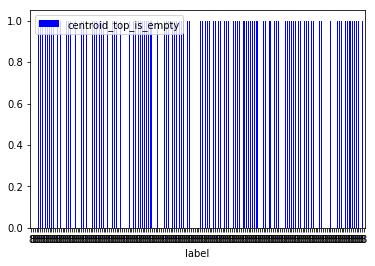

In [128]:
# centroid8 = df[(df.label == 8)]
# # xCentroid8 = centroid8['label']
# # yCentroid8 = centroid8['centroid_top_is_empty']

# # xCentroid0 = centroid8['label']
# # yCentroid0 = centroid8['centroid_bottom_is_empty']
# # plt.scatter(x= xCentroid8, y= yCentroid8, c='DarkBlue')
# # plt.scatter(x= xCentroid0, y= yCentroid0, c='DarkGreen')
# # plt.legend(["8", "0"]);
# centroid8.plot.bar(x='label', y='centroid_top_is_empty', rot=0)

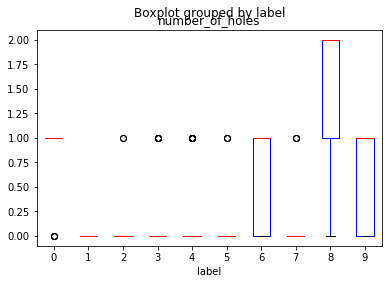

In [118]:
df.boxplot(by='label',column='number_of_holes', 
                       grid=False)


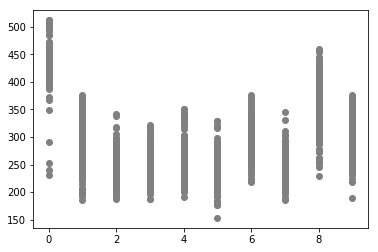

In [126]:
plt.scatter(x=label, y= df.blob_area, c='grey')

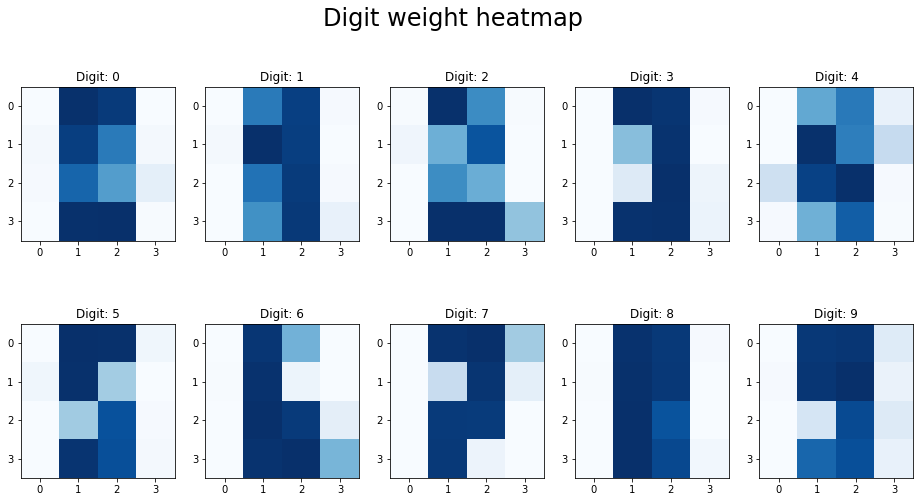

In [39]:
means = df.groupby('label').mean()
COUNT = 4
def mean_weight_matrix(label):
    m = np.zeros((COUNT,COUNT))
    for x in range(COUNT):
        for y in range(COUNT):
            m[x][y] = means['_'.join(['grid', str(x+1), str(y+1)])][label]
    return m

fig, axs = plt.subplots(2, int(10 / 2), figsize=(16,8))
fig.suptitle('Digit weight heatmap', fontsize=24)
for i in range(10):
    sub_fig = axs[1 if i > (10 / 2.0 - 1) else 0][int(i % (10 / 2))]
    sub_fig.set_title('Digit: ' + str(i))
    sub_fig.imshow(mean_weight_matrix(i), cmap='Blues', interpolation='nearest')

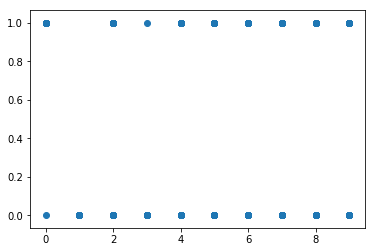

In [13]:
plt.scatter(x= df.label, y= df.centroid_is_empty)

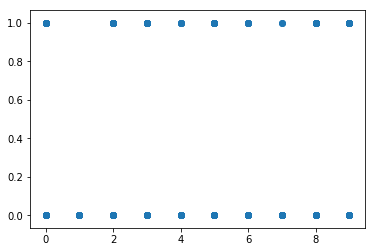

In [134]:
plt.scatter(x=df.label, y= df.centroid_top_is_empty)

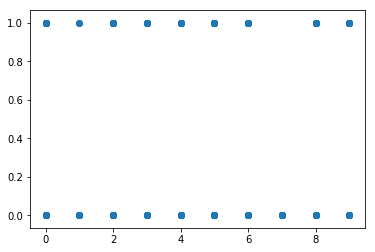

In [135]:
plt.scatter(x=df.label, y= df.centroid_bottom_is_empty)

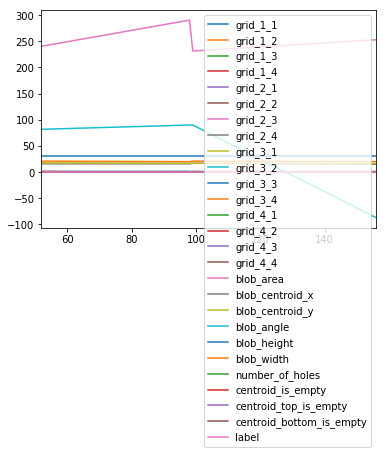

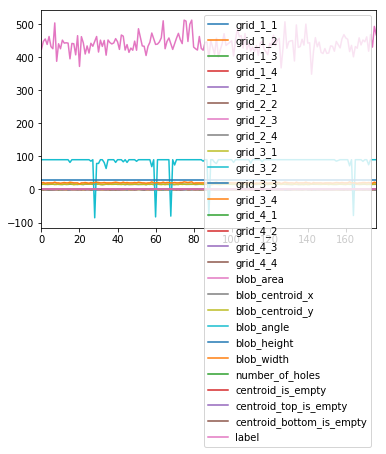

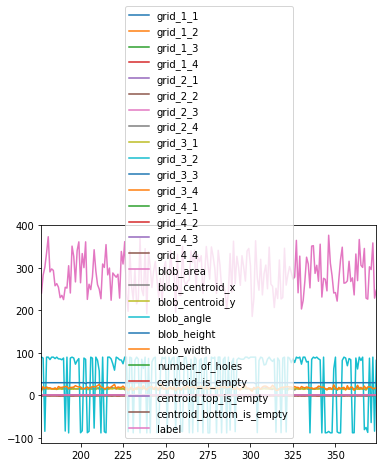

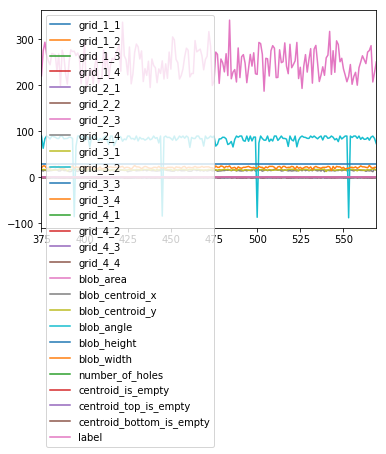

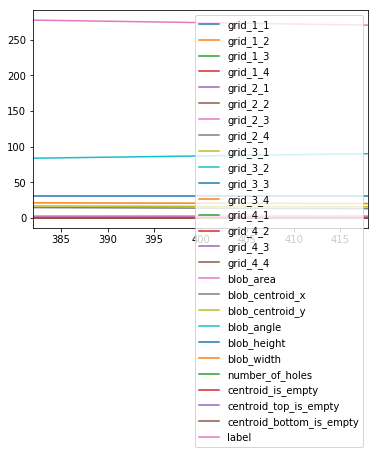

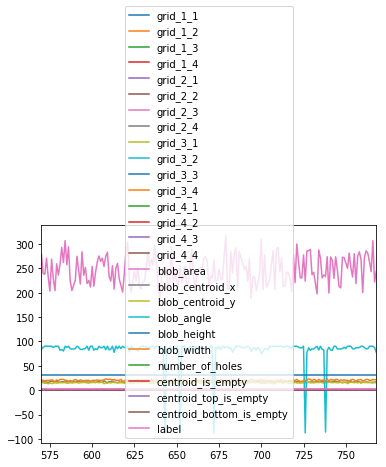

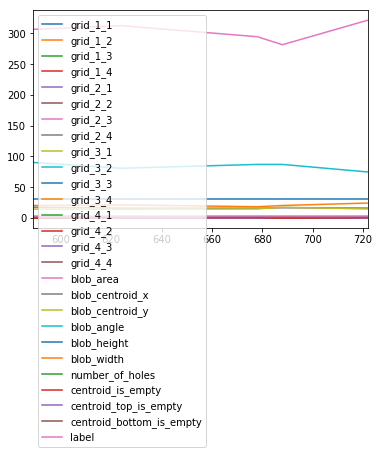

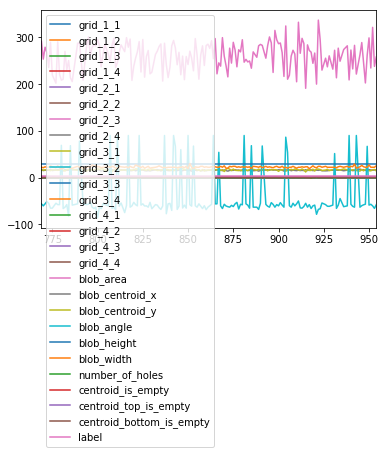

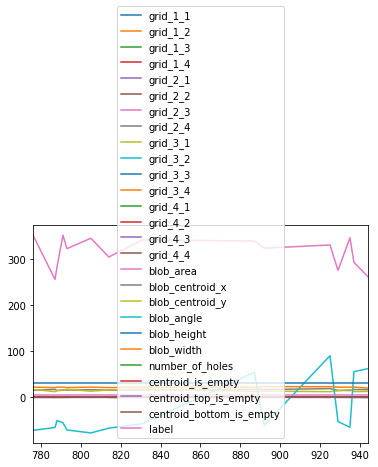

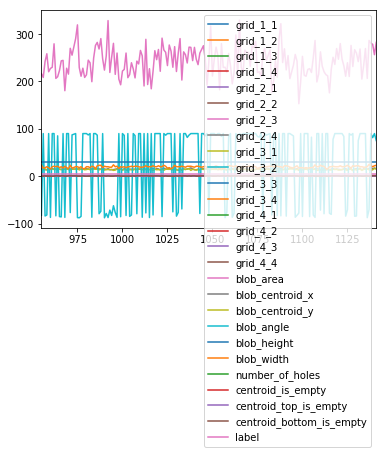

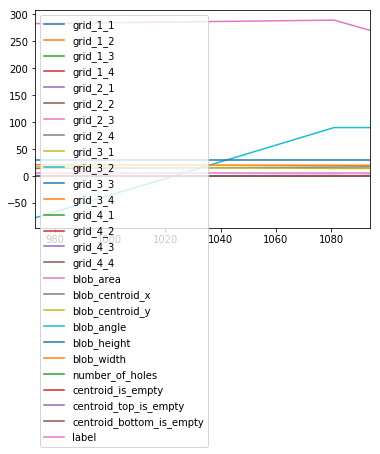

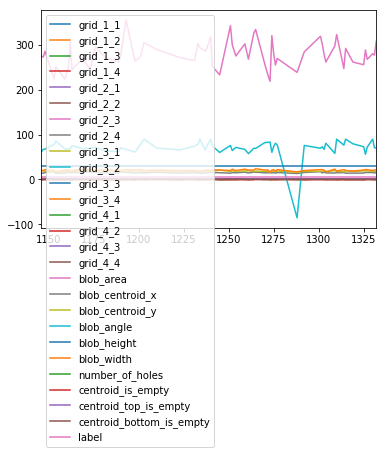

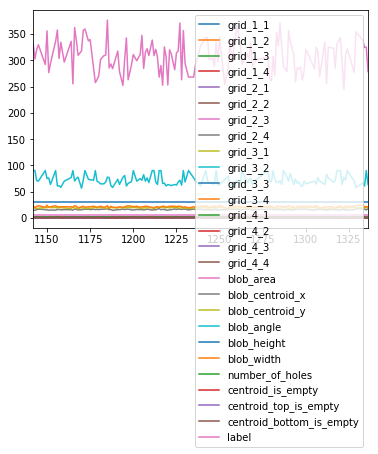

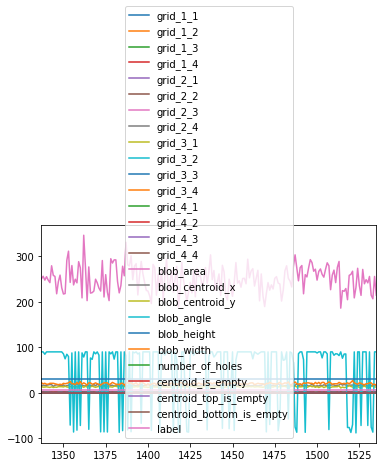

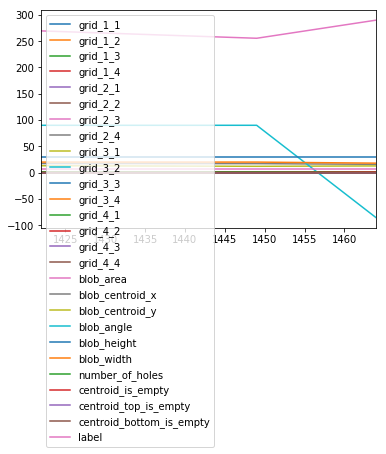

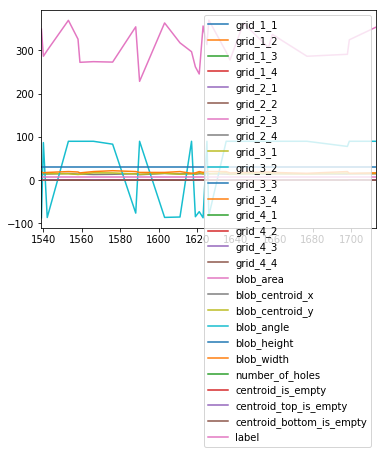

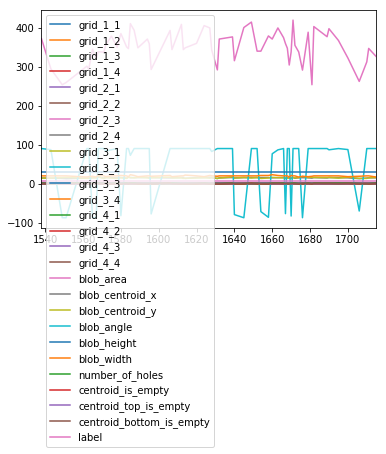

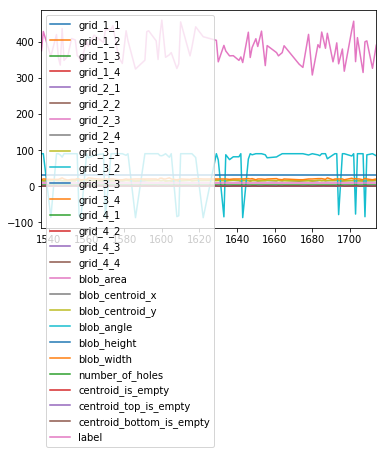

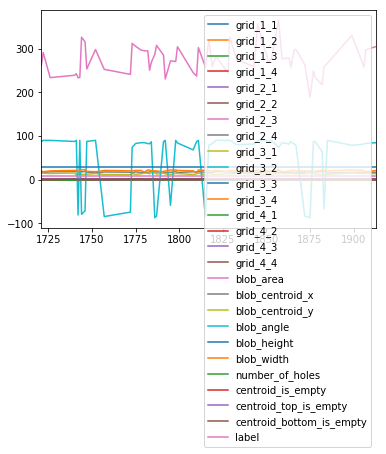

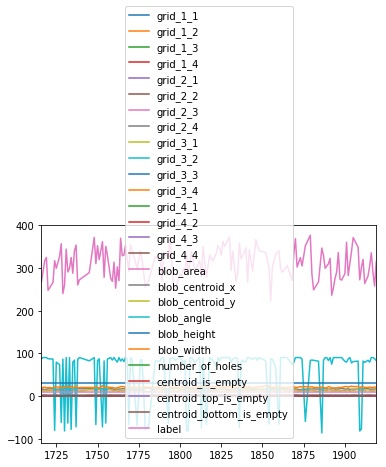

In [137]:
#digit, amount of holes, counter
df1 = df.groupby(['label', 'number_of_holes']).plot()
# df1.head()
# df1 = df.filter(items=['label', 'inverted_blob_count'])


# df1.groupby(['label', 'inverted_blob_count']).head()
# DataFrame({'count' : df1.groupby( ['label', 'inverted_blob_count']).size()}).reset_index()
# xCentroid = df['inverted_blob_count']
# yCentroid = df1.count()
# plt.scatter(x= xCentroid, y= xCentroid, c='DarkBlue')

# preprocessing

In [173]:
# remove blob angle & blob height
# df.drop(column=['blob_height', 'blob_angle'])
df = df.drop(['blob_height', 'blob_angle'], axis=1)
df

,grid_1_1,grid_1_2,grid_1_3,grid_1_4,grid_2_1,grid_2_2,grid_2_3,grid_2_4,grid_3_1,grid_3_2,...,grid_4_4,blob_area,blob_centroid_x,blob_centroid_y,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
0,0,1,1,0,0,1,1,0,0,1,...,0,424.0,15.424528,15.757469,20,1,1,1,1,0
1,0,1,1,0,0,1,0,0,0,0,...,0,447.5,15.733333,16.043575,21,1,1,1,1,0
2,0,1,1,0,0,1,1,0,0,1,...,0,455.0,16.009158,15.209890,19,1,1,0,1,0
3,0,1,1,0,0,1,1,0,0,0,...,0,438.5,15.229571,16.378563,20,1,1,0,1,0
4,0,1,1,0,0,1,1,0,0,0,...,0,462.5,15.646126,16.255135,20,1,1,1,0,0
5,0,1,1,0,0,1,0,0,0,0,...,0,432.0,15.749614,15.942901,20,1,1,0,1,0
6,0,1,1,0,0,1,0,0,0,1,...,0,425.5,15.910302,16.151586,20,1,1,0,1,0
7,0,1,1,0,0,1,0,1,0,1,...,0,503.5,15.370738,15.299239,22,1,1,0,1,0
8,0,1,1,0,0,1,1,0,0,1,...,0,387.5,16.318280,15.209892,20,1,1,0,1,0
9,0,1,1,0,0,0,1,0,0,0,...,0,440.5,15.448733,16.160045,20,1,1,1,1,0


In [151]:
#### normalization 
min_max_scaler = preprocessing.MinMaxScaler()

scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(scaled, columns=df.columns)
df_normalized.head()

,grid_1_1,grid_1_2,grid_1_3,grid_1_4,grid_2_1,grid_2_2,grid_2_3,grid_2_4,grid_3_1,grid_3_2,...,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty,label
0,0,1,1,0,0,1,1,0,0,1,...,0.418515,0.504416,1,1,0.50,0.5,1,1,1,0
1,0,1,1,0,0,1,0,0,0,0,...,0.454527,0.532305,1,1,0.55,0.5,1,1,1,0
2,0,1,1,0,0,1,1,0,0,1,...,0.486693,0.451039,1,1,0.45,0.5,1,0,1,0
3,0,1,1,0,0,1,1,0,0,0,...,0.395780,0.564958,1,1,0.50,0.5,1,0,1,0
4,0,1,1,0,0,1,1,0,0,0,...,0.444358,0.552927,1,1,0.50,0.5,1,1,0,0
